# Outras tarefas com imagens

Vamos abordar algumas outras tarefas de IAs para imagens aqui:

## Upscaling de imagens

Se tivermos uma imagem em resolução muito baixa, podemos usar uma IA para ampliar a resolução digitalmente. Vamos testar com https://huggingface.co/caidas/swin2SR-lightweight-x2-64

In [1]:
from transformers import pipeline

modelo = "caidas/swin2SR-lightweight-x2-64"
ampliador = pipeline("image-to-image", model=modelo)

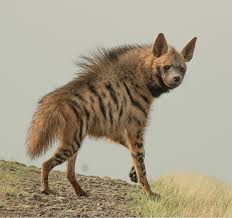

In [2]:
from pathlib import Path
from PIL import Image

imagem = Image.open(Path('imagens/animals/hyena.jpeg'))
imagem

In [3]:
imagem.size

(232, 218)

In [4]:
imagem_ampliada = ampliador(imagem)

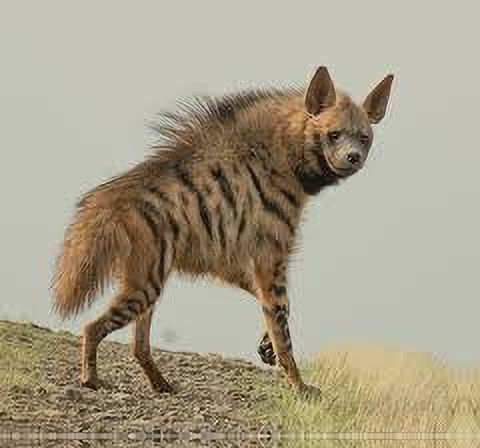

In [5]:
imagem_ampliada

In [6]:
imagem_ampliada.size

(480, 448)

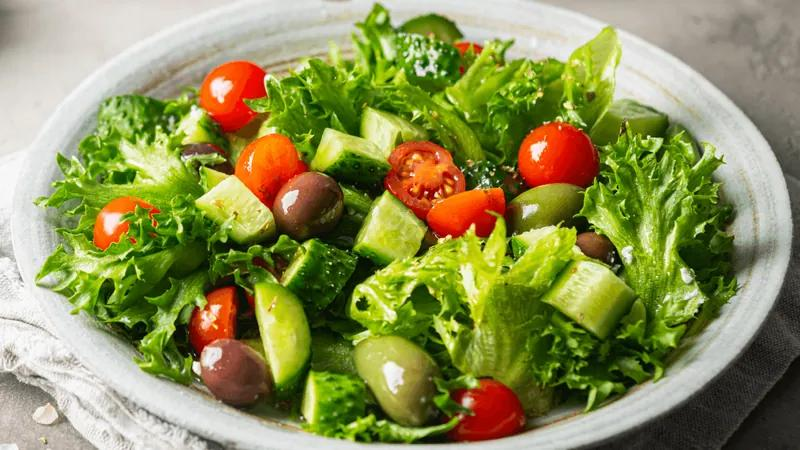

(800, 450)


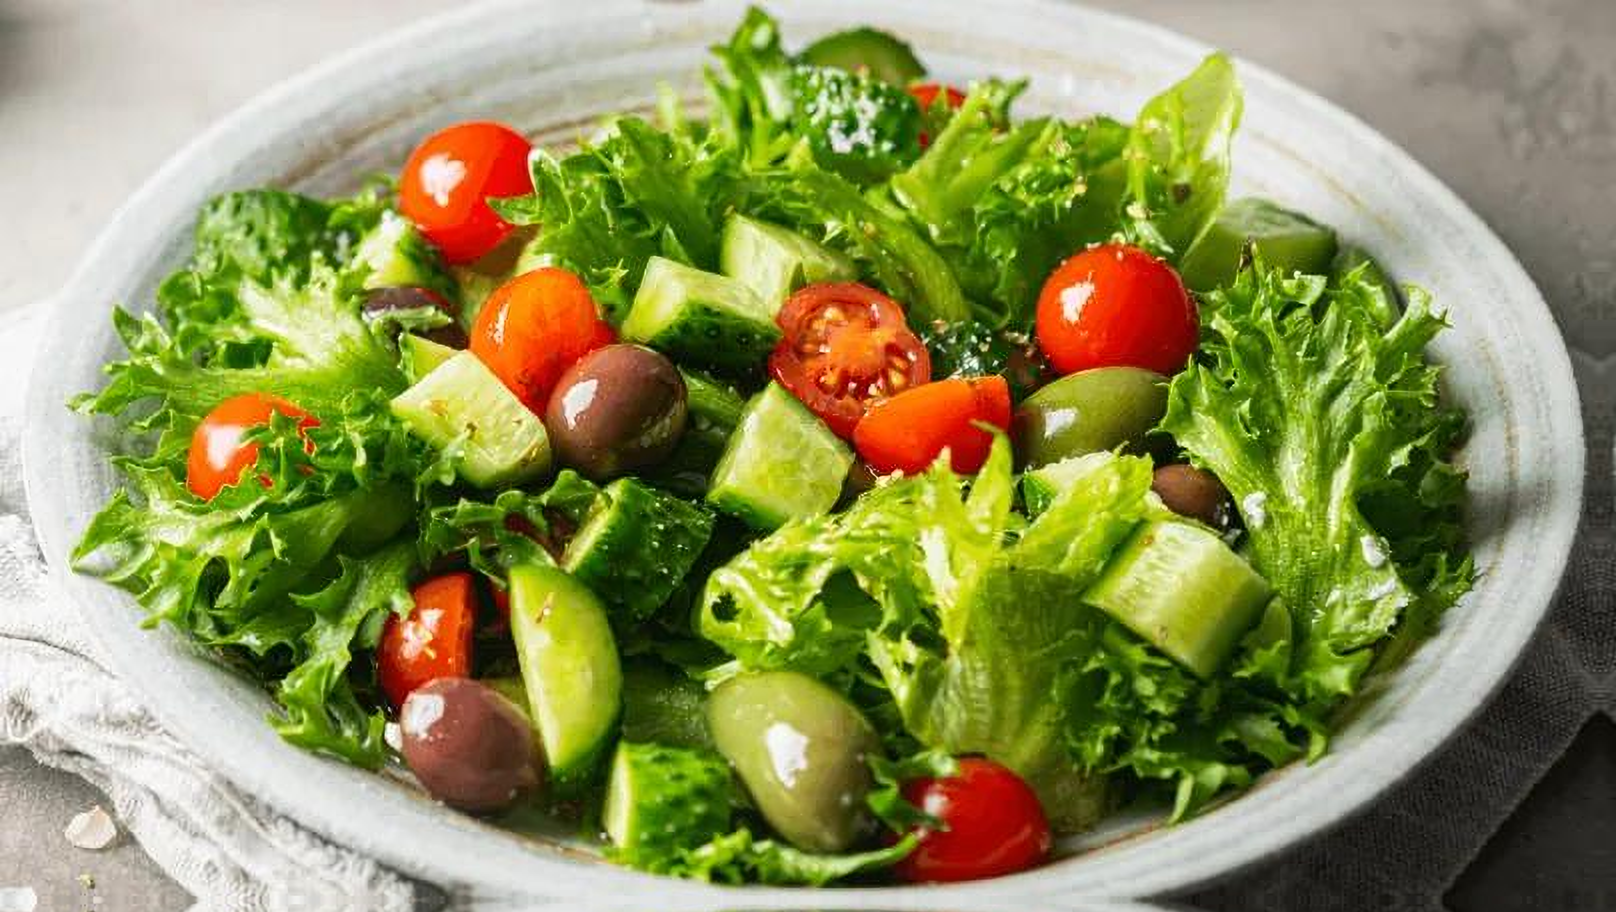

(1616, 912)


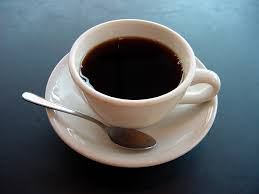

(259, 194)


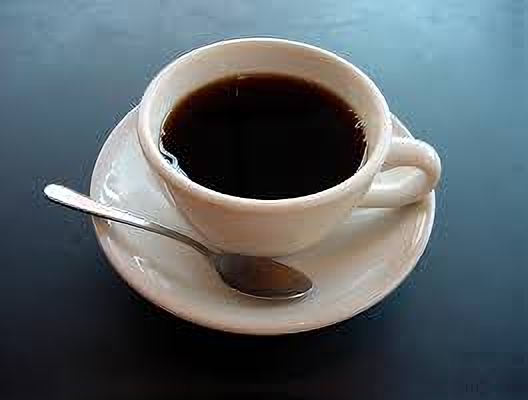

(528, 400)


In [8]:
arquivos = [
    'imagens/comidas/salada.jpg',
    'imagens/comidas/cafe.jpg',
]
imagens = [Image.open(p) for p in arquivos]

for imagem in imagens:
    display(imagem)
    print(imagem.size)
    imagem_ampliada = ampliador(imagem)
    display(imagem_ampliada)
    print(imagem_ampliada.size)

Em geral, os artefatos são menos perceptíveis em imagens menos nítidas ("borradas").

Vamos ler a imagem armazenada na seguinte URL: https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/cat.jpg"

(532, 432)


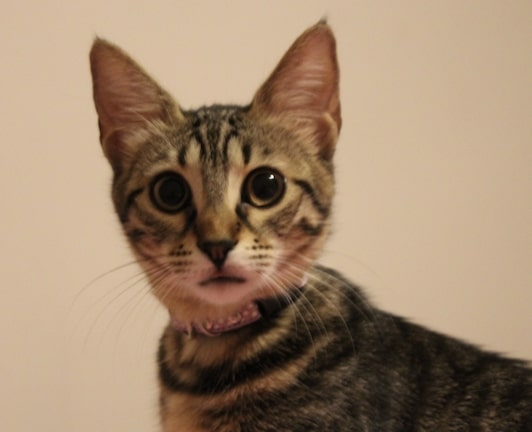

In [12]:
import requests

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/cat.jpg"

dados_url = requests.get(url, stream=True).raw
imagem = Image.open(dados_url)
print(imagem.size)
imagem

(1072, 880)


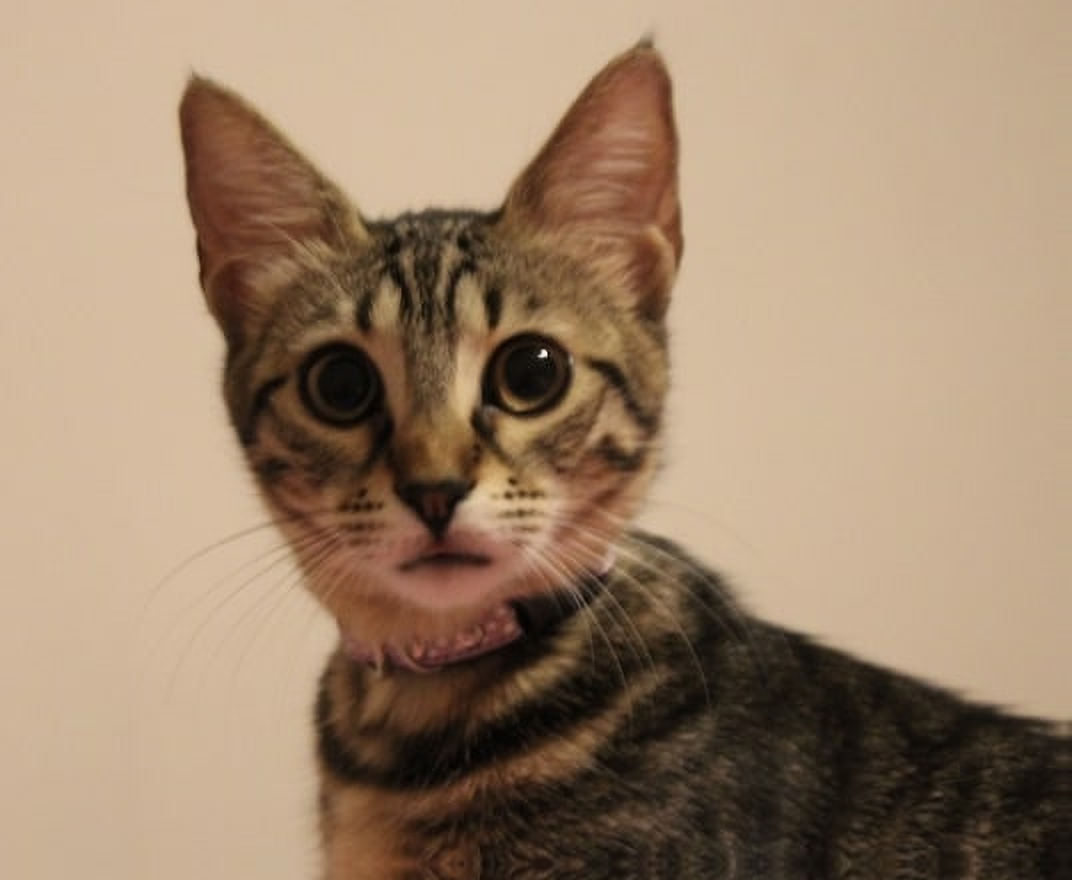

In [13]:
imagem_ampliada = ampliador(imagem)
print(imagem_ampliada.size)
imagem_ampliada

## Descrição de imagens

Existem modelos que descrevem uma imagem passada a eles. Vamos testar o https://huggingface.co/microsoft/git-large-coco

In [4]:
modelo = "microsoft/git-large-coco"
descritor_imagens = pipeline('image-to-text', model=modelo)

model.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

/home/juliano/.cache/pypoetry/virtualenvs/ias_para_imagens,_áudio_e_vídeo_no_hugging-hFrc_0yz-py3.11/lib/python3.11/site-packages/transformers/generation/utils.py:1132: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'a red fox standing in a field of grass.'}]


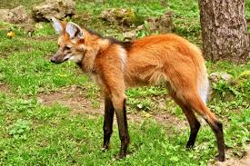

[{'generated_text': 'african wild dog in the wild'}]


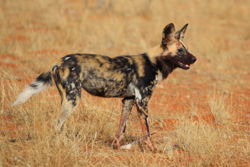

[{'generated_text': 'a hyena with a long neck standing on a hill.'}]


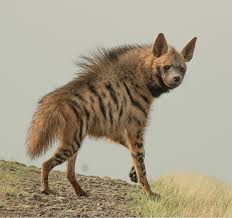

[{'generated_text': 'a mountain lion is seen on a rocky mountain.'}]


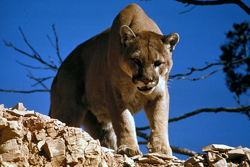

[{'generated_text': 'a close up of a cat laying in the grass'}]


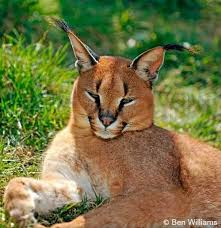

[{'generated_text': 'a tiger in the wild'}]


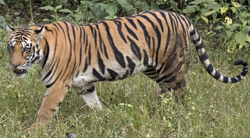

In [6]:
imagens = [Image.open(arquivo) for arquivo in Path('imagens/animals').iterdir()]

for imagem in imagens:
    imagem.thumbnail((250, 250))
    descricao = descritor_imagens(imagem)
    print(descricao)
    display(imagem)

[{'generated_text': 'a dog rolling around in the grass'}]


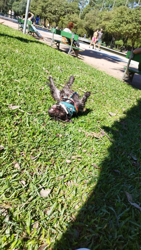

[{'generated_text': '[ unused0 ], an adoptable yorkshire terrier & terrier mix in san diego,'}]


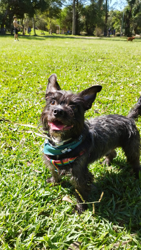

[{'generated_text': 'a white dog laying on a rug with a toy in its mouth.'}]


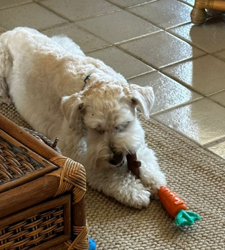

[{'generated_text': 'a dog sleeping on the floor'}]


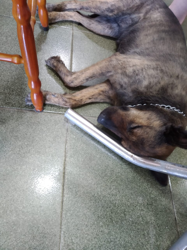

[{'generated_text': '[ unused0 ], an adoptable schnauzer in san diego, ca'}]


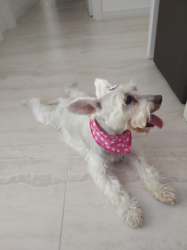

In [7]:
imagens = [Image.open(arquivo) for arquivo in Path('imagens/dogs').iterdir()]

for imagem in imagens:
    imagem.thumbnail((250, 250))
    descricao = descritor_imagens(imagem)
    print(descricao)
    display(imagem)

[{'generated_text': '[ unused0 ] wearing a white dress with a long wavy hair'}]


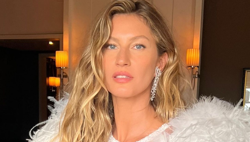

[{'generated_text': 'a portrait of [ unused0 ]'}]


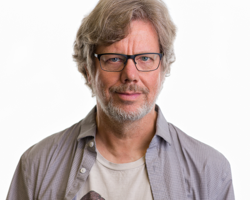

In [8]:
imagens = [Image.open(arquivo) for arquivo in Path('imagens/pessoas').iterdir()]

for imagem in imagens:
    imagem.thumbnail((250, 250))
    descricao = descritor_imagens(imagem)
    print(descricao)
    display(imagem)

[{'generated_text': 'a living room with a couch and a tv.'}]


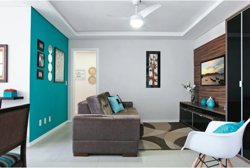

[{'generated_text': 'a living room with a white sofa, a coffee table, a chair and a large window.'}]


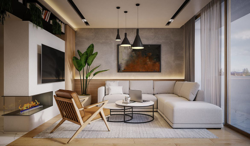

[{'generated_text': 'the bathroom is a small space with a shower and a toilet.'}]


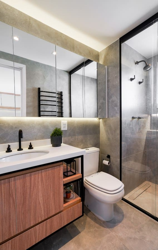

[{'generated_text': 'the building is a hotel that has a lot of windows.'}]


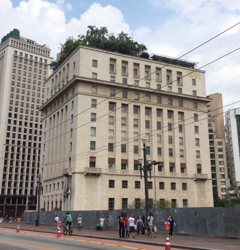

[{'generated_text': 'the palace of the national opera of brazil'}]


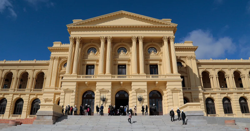

[{'generated_text': 'the building where the apartment is located'}]


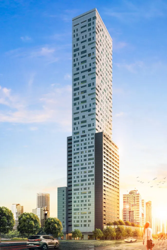

[{'generated_text': 'a kitchen with a brick wall and a wine rack.'}]


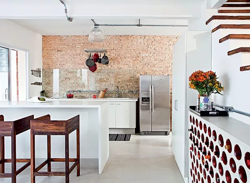

[{'generated_text': 'the building in which the guest house is located'}]


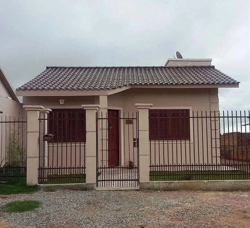

[{'generated_text': 'a living room with a tv and a wooden cabinet'}]


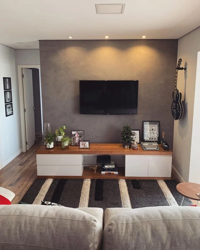

[{'generated_text': 'a small deck with a small table and chairs'}]


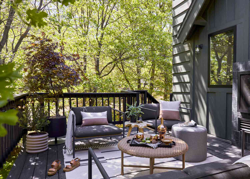

[{'generated_text': 'the master bathroom is a large mirror and a large mirror.'}]


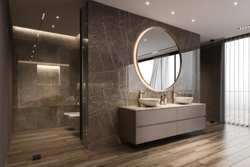

In [9]:
imagens = [Image.open(arquivo) for arquivo in Path('imagens/casas').iterdir()]

for imagem in imagens:
    imagem.thumbnail((250, 250))
    descricao = descritor_imagens(imagem)
    print(descricao)
    display(imagem)

Aplicações para pessoas com deficiência visual -> leitor de imagens da tela!

- Descreve imagem em inglês
- Traduz de inglês para português
- Gera áudio em português a partir da tradução